In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
pip install statsmodels 

In [ ]:
data = pd.read_excel('/content/datos_runt.xlsx', sheet_name =0, header = 0) 

In [ ]:
data.head(4)

,fecha,tasa_desempleo,inflacion,promedio_TRM_mes,Salario_minimo_auxtte,indice_confianza,indice_expe,indice_cond_eccas,precio_petroleo,dias_habiles_mes,temporada,clima,ingresos,precios_gral,runt_mercado,runt_yamaha
0,2001-01-01,0.167,0.085,2242.0,316000,NaN,NaN,NaN,28.66,25,Escolar,Heladas,Aumento de sueldos,35% inflacion,3690,1380
1,2001-02-01,0.173,0.081,2244.0,316000,NaN,NaN,NaN,27.39,24,Escolar. San Valentin,Heladas,Iguales,20% inflacion,5032,1935
2,2001-03-01,0.157,0.078,2279.0,316000,NaN,NaN,NaN,26.29,26,Semana santa. dia de la mujer,Primavera,Iguales,10% inflacion,5581,1791
3,2001-04-01,0.146,0.080,2323.0,316000,NaN,NaN,NaN,28.46,23,Semana santa,Lluvias mil,Iguales,5% inflacion,4414,1801


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha                  248 non-null    datetime64[ns]
 1   tasa_desempleo         248 non-null    float64       
 2   inflacion              248 non-null    float64       
 3   promedio_TRM_mes       248 non-null    float64       
 4   Salario_minimo_auxtte  248 non-null    int64         
 5   indice_confianza       238 non-null    float64       
 6   indice_expe            238 non-null    float64       
 7   indice_cond_eccas      238 non-null    float64       
 8   precio_petroleo        248 non-null    float64       
 9   dias_habiles_mes       248 non-null    int64         
 10  temporada              248 non-null    object        
 11  clima                  248 non-null    object        
 12  ingresos               248 non-null    object        
 13  preci

In [ ]:
data.shape

(248, 16)

In [ ]:
data.temporada.unique()

array(['Escolar', 'Escolar. San Valentin',
       'Semana santa. dia de la mujer', 'Semana santa',
       'Madres. dia trabajo', 'Padre', 'Prima', 'Descuentos del comercio',
       'Amor y amistad', 'Halloween', 'Navidad - Black Friday', 'Navidad'],
      dtype=object)

In [ ]:
data.clima.unique()

array(['Heladas', 'Primavera', 'Lluvias mil', 'Vientos', 'Lluvias',
       'Soleado'], dtype=object)

In [ ]:
data.ingresos.unique()

array(['Aumento de sueldos', 'Iguales', 'Comienza prima', 'Prima'],
      dtype=object)

In [ ]:
dic_temporada = {'Escolar':1, 'Escolar. San Valentin':2,
       'Semana santa. dia de la mujer':3, 'Semana santa':4,
       'Madres. dia trabajo':5, 'Padre':6, 'Prima':7, 'Descuentos del comercio':8,
       'Amor y amistad':9, 'Halloween':10, 'Navidad - Black Friday':11, 'Navidad':12}

In [ ]:
data["temporada"] = data["temporada"].map(dic_temporada)

In [ ]:
dic_clima = { 'Heladas':1, 'Primavera':2, 'Lluvias mil':3, 'Vientos':4, 'Lluvias':5,
       'Soleado':6}

In [ ]:
data["clima"] = data["clima"].map(dic_clima)

In [ ]:
dic_ingresos = {'Aumento de sueldos':0, 'Iguales':1, 'Comienza prima':2, 'Prima':3}

In [ ]:
data["ingresos"] = data["ingresos"].map(dic_ingresos)

## Correlacion

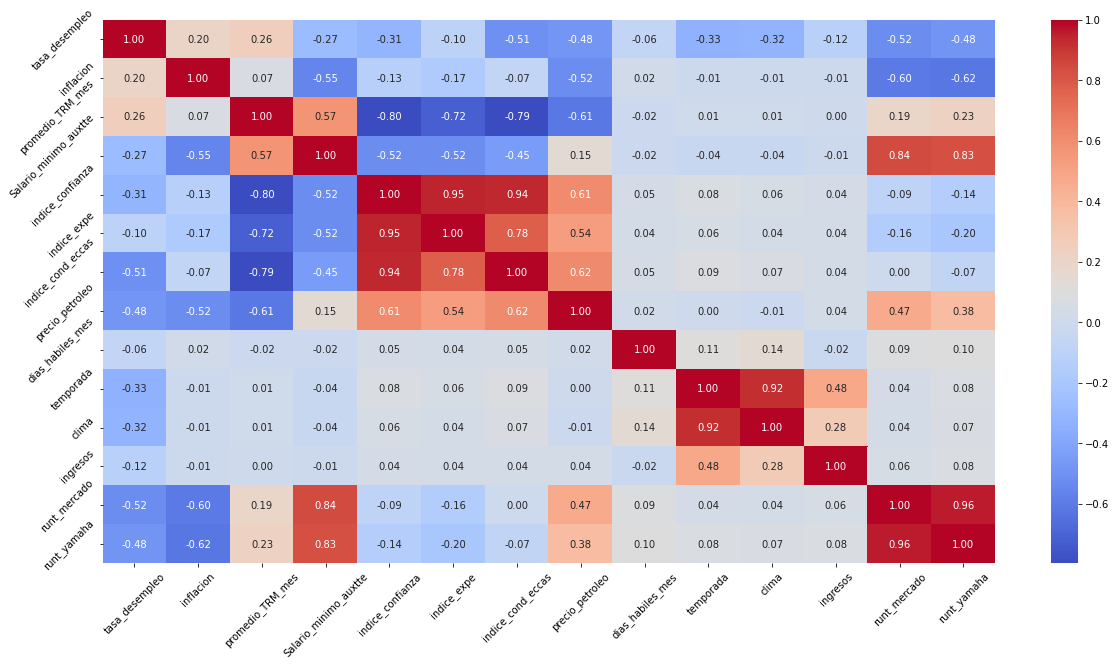

In [ ]:
corr = data.corr()

plt.figure(figsize = (20,10))
sns.heatmap(corr, annot=True, fmt = '.2f', cmap='coolwarm')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

Qué factores están correlacionados con el mercado de motos? ¿cuáles descartaría?

**Es posible determinar la correlacion mas alta entre las variables.**


runt_mercado se reaciona fuertemente con runt_yamaha, salario minimo_auxtte, inflacion de manera inversa, tasa de desempleo de manera indirecta, precio petrole de manera directa.



-----------------------------------------------------------


**Otras variables correlacionadas:** 

El salario minimo  auxtte esta muy correlacionado con las variables runt_yamaha y runt_mecado.

El promedio_TRM_meses esta correlacionado con el indice de confianza, el indice_expe, el indice_cond_eccas, precio del petroleo. 

La tasa del desempleo esta correlacionada con indice_cond_eccas, precio en petrole, runt mercado de manera inversa.

Inflacion esta correlacionada con runt_mercado , precio petroleo de manera inversa. 

Indice de confianza esta muy correlacionado con el indice_cond_eccas y indice_expe de manera directa y promedio TRM pero de manera inversa.

EL indice con_ecccas se relciona fuertemente con el indice de confianza, indice expe demanera directa y con promedio TRM_meses de manera indirecta.



-----------------------------------------------------------

Si quisieramos descartar variables que no explican mi variable target (runt mercado) serian las siguientes : 
1. dias habiles mes 
2. indice cond eccas
3. indice expe
4. indice confianza
5. Promedio TRM meses
6. clima
7. temporada
8. ingresos
9. salario minimo auxtte

In [ ]:
data1 = data.copy()

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha                  248 non-null    datetime64[ns]
 1   tasa_desempleo         248 non-null    float64       
 2   inflacion              248 non-null    float64       
 3   promedio_TRM_mes       248 non-null    float64       
 4   Salario_minimo_auxtte  248 non-null    int64         
 5   indice_confianza       238 non-null    float64       
 6   indice_expe            238 non-null    float64       
 7   indice_cond_eccas      238 non-null    float64       
 8   precio_petroleo        248 non-null    float64       
 9   dias_habiles_mes       248 non-null    int64         
 10  temporada              248 non-null    int64         
 11  clima                  248 non-null    int64         
 12  ingresos               248 non-null    int64         
 13  preci

In [ ]:
data1 = data1.drop(['dias_habiles_mes', 'indice_cond_eccas', 'clima', 'temporada', 'indice_expe', 'indice_confianza', 'promedio_TRM_mes', 'precios_gral', 'ingresos','Salario_minimo_auxtte' ], axis =1)
data1.head(4) 

,fecha,tasa_desempleo,inflacion,precio_petroleo,runt_mercado,runt_yamaha
0,2001-01-01,0.167,0.085,28.66,3690,1380
1,2001-02-01,0.173,0.081,27.39,5032,1935
2,2001-03-01,0.157,0.078,26.29,5581,1791
3,2001-04-01,0.146,0.080,28.46,4414,1801


In [ ]:
data1.isna().sum()

fecha              0
tasa_desempleo     0
inflacion          0
precio_petroleo    0
runt_mercado       0
runt_yamaha        0
dtype: int64

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            248 non-null    datetime64[ns]
 1   tasa_desempleo   248 non-null    float64       
 2   inflacion        248 non-null    float64       
 3   precio_petroleo  248 non-null    float64       
 4   runt_mercado     248 non-null    int64         
 5   runt_yamaha      248 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 11.8 KB


# Boxplots

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


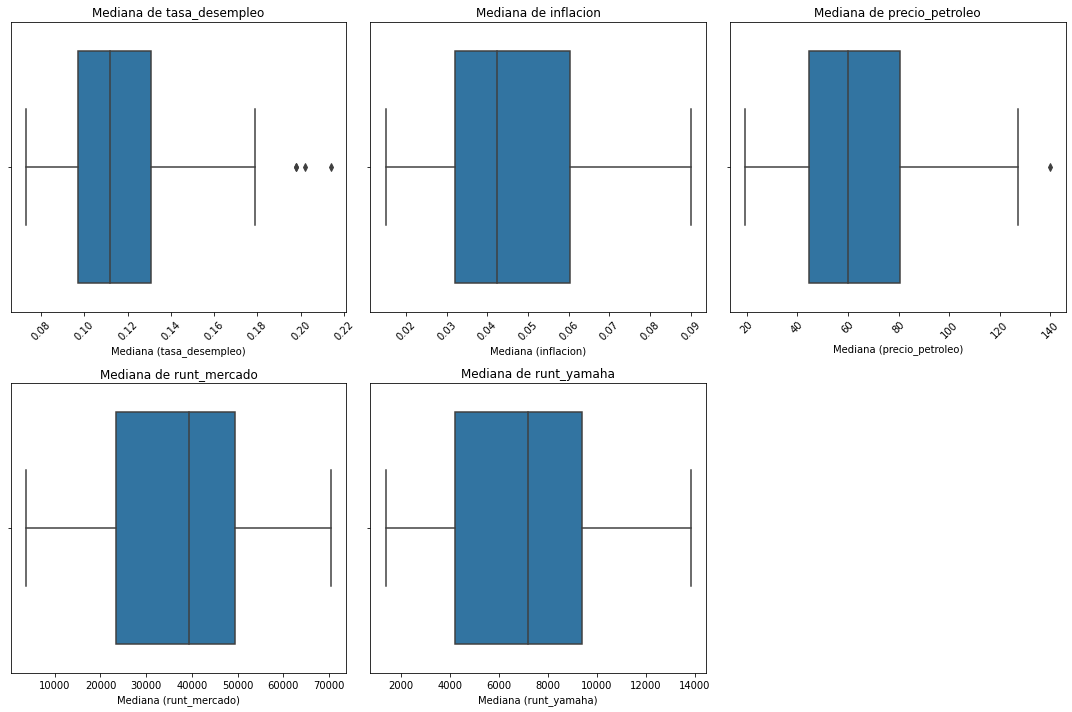

In [ ]:
#diagrama de caja 

plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
#sns.boxplot(x ='fecha', data = data1)
#plt.xticks(rotation=45)
#plt.xlim(000,700000)
#plt.xlabel('Mediana (fecha)')
#plt.title('Mediana de fecha') 



plt.subplot(2,3,1)
sns.boxplot(x='tasa_desempleo', data = data1)
plt.xticks(rotation=45)
plt.xlabel('Mediana (tasa_desempleo)')
plt.title('Mediana de tasa_desempleo') 



plt.subplot(2,3,2)
sns.boxplot(x = 'inflacion', data = data1)
plt.xticks(rotation=45)
plt.xlabel('Mediana (inflacion)')
plt.title('Mediana de inflacion') 


plt.subplot(2,3,3)
sns.boxplot(x = 'precio_petroleo', data = data1)
plt.xticks(rotation=45)
plt.xlabel('Mediana (precio_petroleo)')
plt.title('Mediana de precio_petroleo') 


plt.subplot(2,3,4)
sns.boxplot(x = "runt_mercado", data = data1)
#plt.xlim(0,500)
plt.xlabel('Mediana (runt_mercado)')
plt.title('Mediana de runt_mercado') 


plt.subplot(2,3,5)
sns.boxplot(x = "runt_yamaha", data = data1)
#plt.xlim(0,500)
plt.xlabel('Mediana (runt_yamaha)')
plt.title('Mediana de runt_yamaha') 

plt.tight_layout()
plt.show()


## Plots

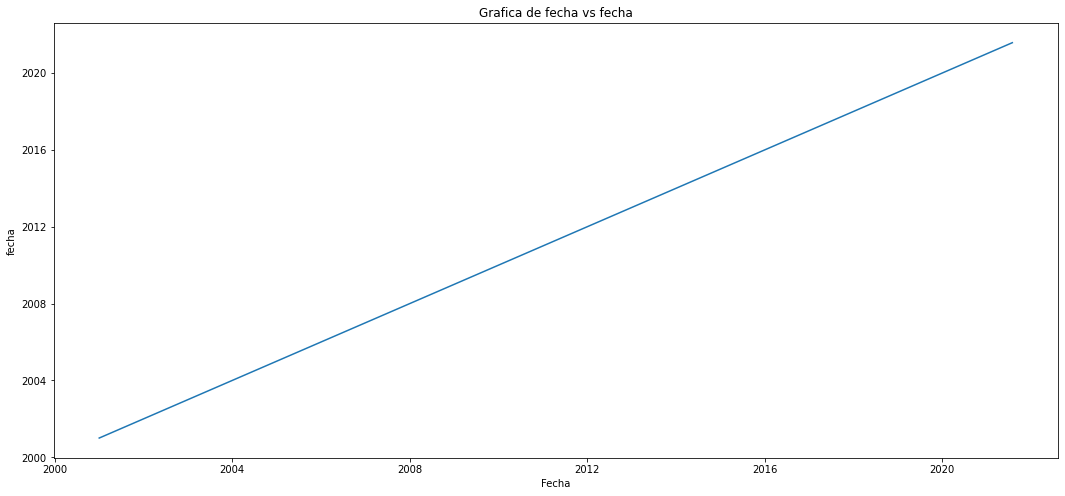

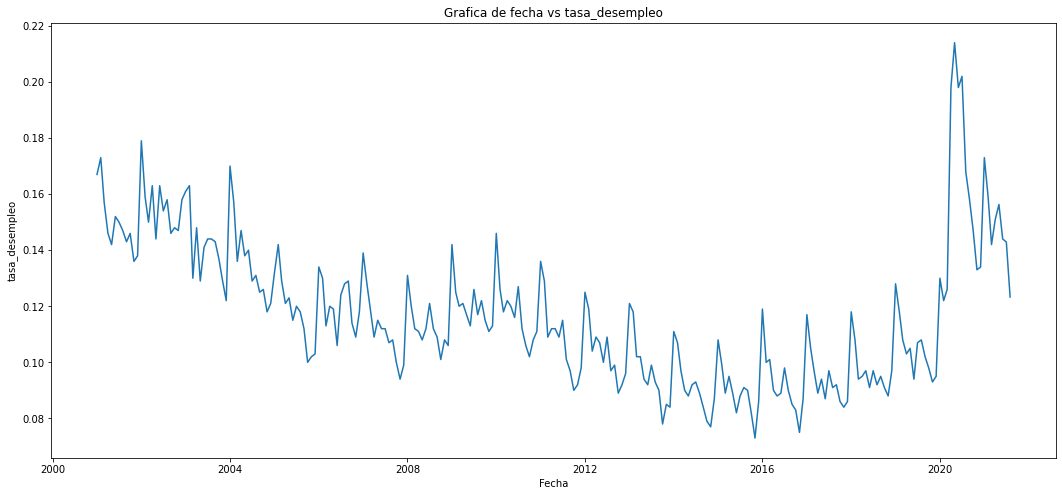

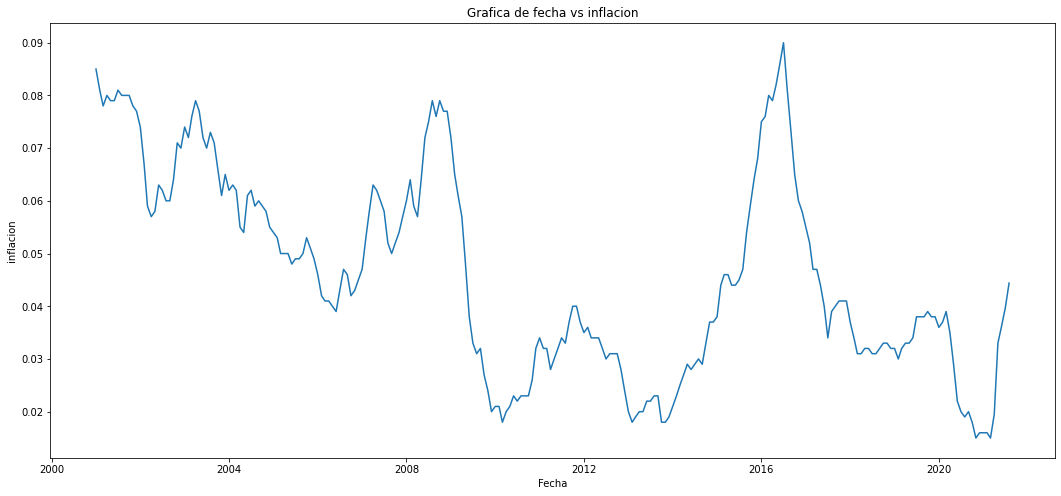

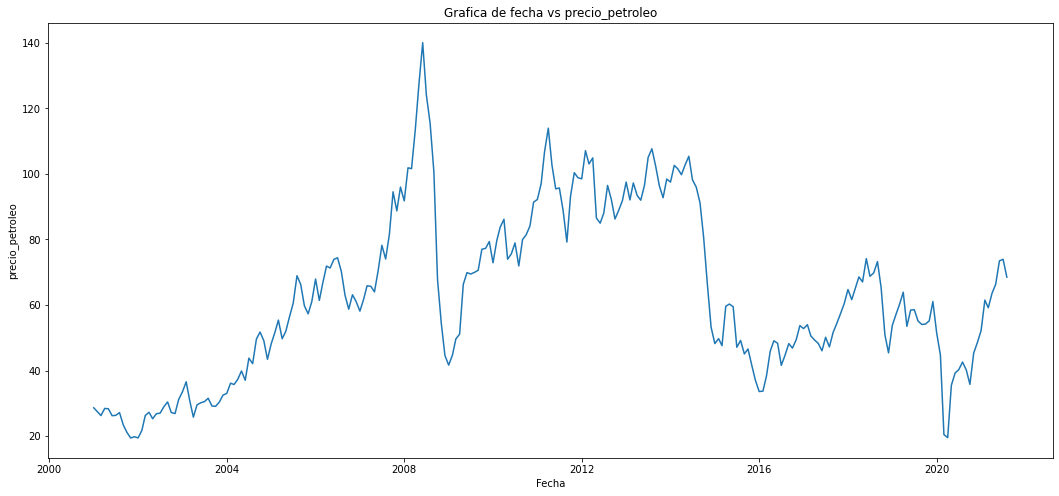

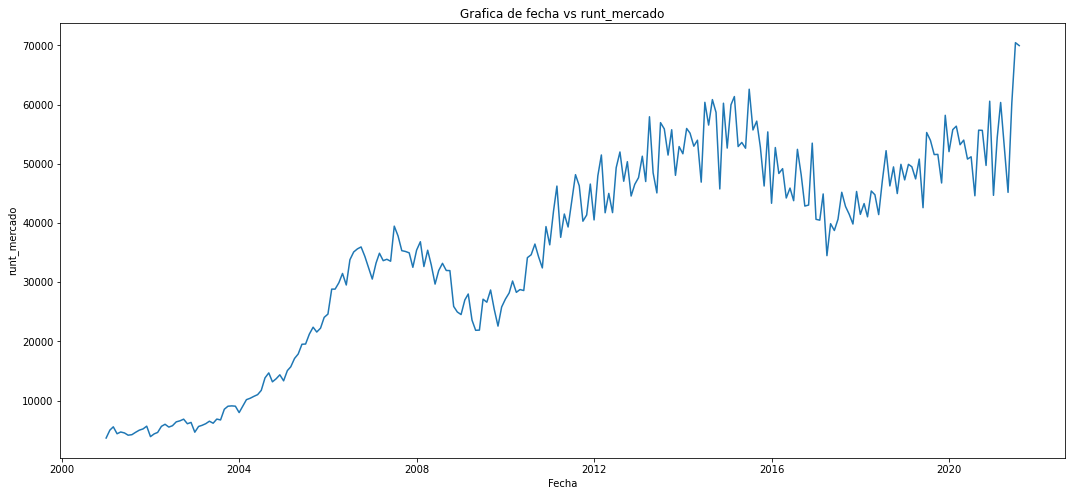

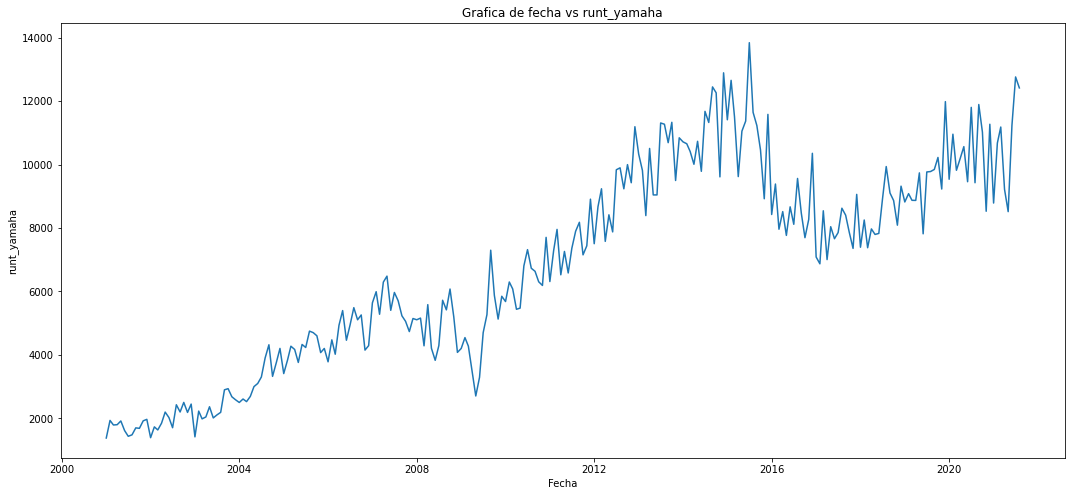

In [ ]:
for i in data1:
  plt.figure(figsize=(18,8))
  plt.plot(data1["fecha"], data1[i]) 
  plt.xlabel("Fecha")
  plt.ylabel(i)
  plt.title(f"Grafica de fecha vs {i}")  

En este caso hacer resample es complicado por la cantidad de datos de fechas que existen. Sin embargo trataremos de realizar un analisis de series de tiempo para predecir la variable Runt Mercado.

In [ ]:
df =data1.copy()

df = df.set_index('fecha')

In [ ]:
df['year'] = df.index.year
df["month"] = df.index.month

**Las series de tiempo deben cumplir un requisito fundamental de estacionariedad.**

Las caracteristicas de las series de timepo no cambian respecto al tiempo

## Kdeplots

In [ ]:
lista = {'tasa_desempleo', 'inflacion', 'precio_petroleo', 'runt_mercado',
       'runt_yamaha'}

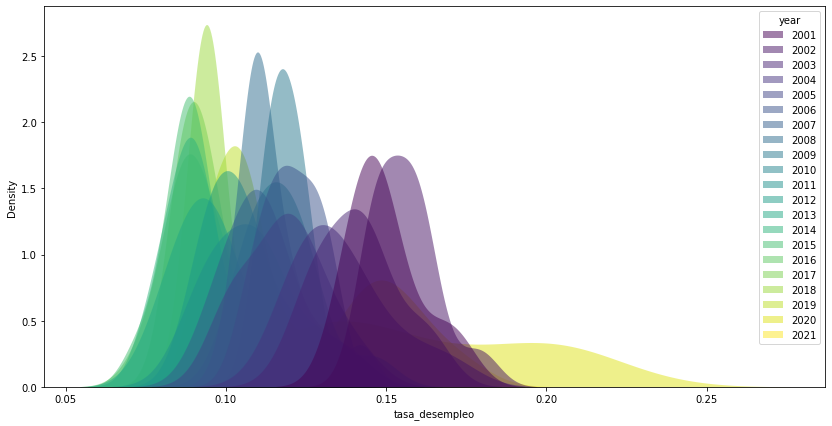

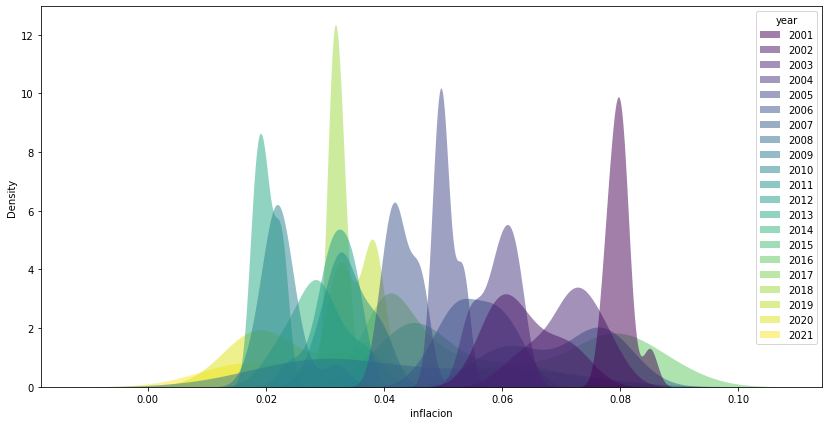

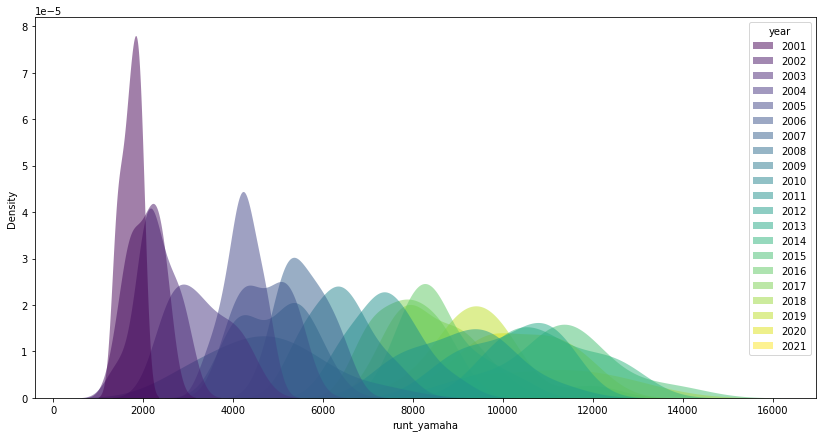

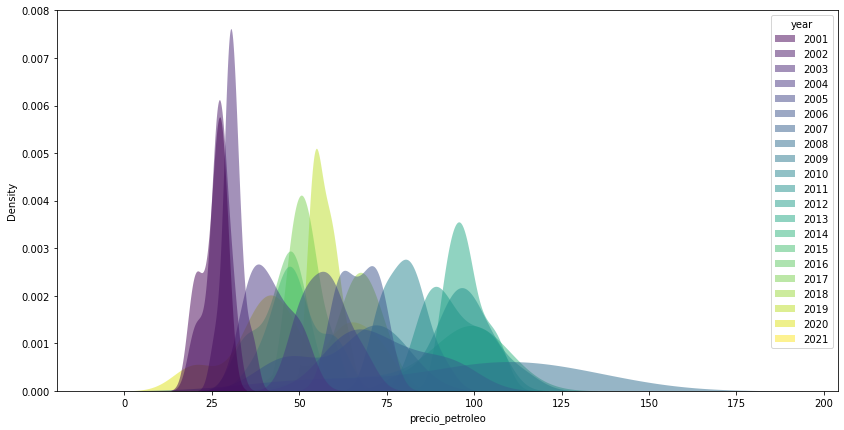

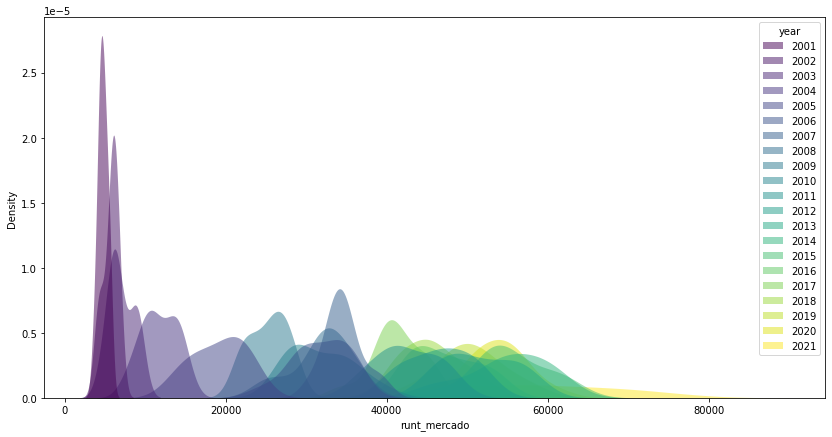

In [ ]:
for i in lista:  
  fig,ax = plt.subplots(figsize=(14,7))
  sns.kdeplot(data=df, x = i, hue="year", fill=True, alpha=.5, linewidth=0, palette="viridis")  
  plt.show()


Es posible observar que la estacionaridad en el tiempo no se esta cumpliendo, debido al cambio en la varianza en el tiempo y en la media de todas las variables no son las mismas. 

Es evidente como aumenta o decrece en funcion del tiempo.

In [ ]:
df.head(3)

,tasa_desempleo,inflacion,precio_petroleo,runt_mercado,runt_yamaha,year,month
fecha,,,,,,,
2001-01-01,0.167,0.085,28.66,3690,1380,2001,1
2001-02-01,0.173,0.081,27.39,5032,1935,2001,2
2001-03-01,0.157,0.078,26.29,5581,1791,2001,3


a


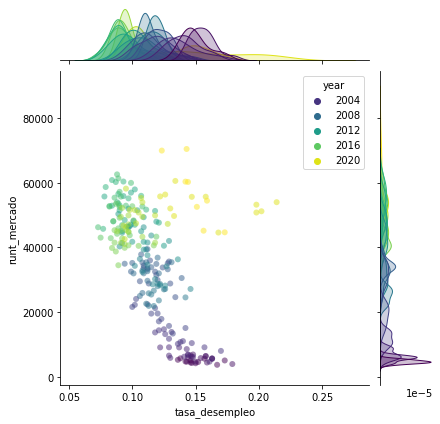

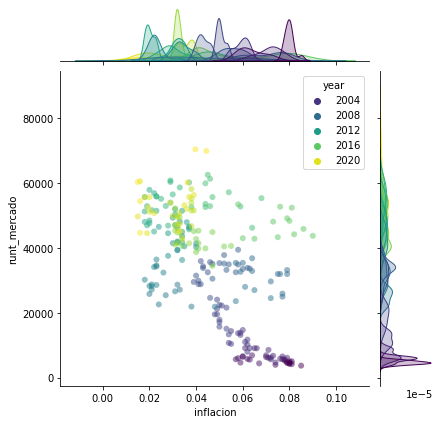

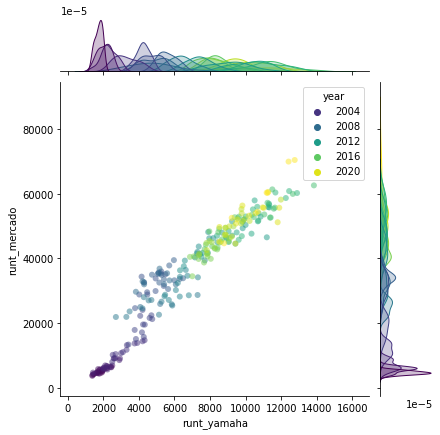

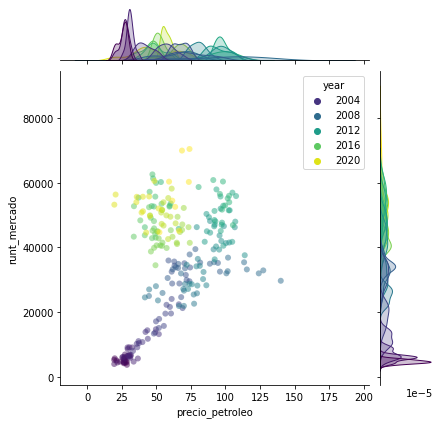

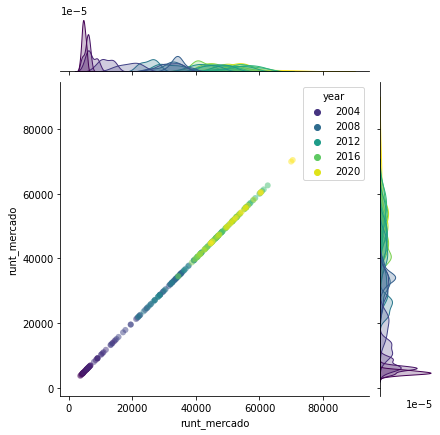

In [ ]:
print('a')
for i in lista: 
  sns.jointplot(data=df, y="runt_mercado", x = i, hue="year", alpha=.5, linewidth=0, palette="viridis")
  plt.show()

Se observa de manera general la agrupacion de los puntos que aumentan con el tiempo, interactuando las variables, algunas de manera lineal, otras de manera no lienal. Todo esto en funcion de la densidad de probabilidad. 

In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
for i in lista:  
  X = df[i].values
  X = np.nan_to_num(X)
  result = adfuller(X)
  print(i), print('ADF Statistic %f' % result[0]), print('p-value: %f' % result[1]), print('Critical Values')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

tasa_desempleo
ADF Statistic -2.033644
p-value: 0.272019
Critical Values
	1%: -3.459
	5%: -2.874
	10%: -2.573
inflacion
ADF Statistic -2.206380
p-value: 0.203938
Critical Values
	1%: -3.459
	5%: -2.874
	10%: -2.573
runt_yamaha
ADF Statistic -1.129943
p-value: 0.702984
Critical Values
	1%: -3.459
	5%: -2.874
	10%: -2.573
precio_petroleo
ADF Statistic -2.707124
p-value: 0.072814
Critical Values
	1%: -3.457
	5%: -2.873
	10%: -2.573
runt_mercado
ADF Statistic -0.763758
p-value: 0.829537
Critical Values
	1%: -3.459
	5%: -2.874
	10%: -2.573


Segun la prubea de hipotesis el valor P no rechazaria H0 la hipotesis nula. Es decir que la estacionaridad si se cumpliria de manera estadistica. todas las variables dan un p > 0.5. 
Sin embargo sabemos de antemano que esto no se esta cumpliendo.

In [ ]:
from pandas.plotting import lag_plot

Identificamos el patron que especifica a nuestras variables

tasa_desempleo


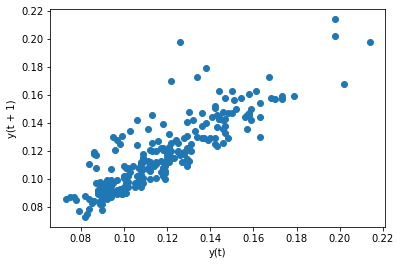

inflacion


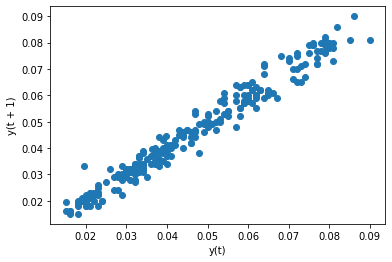

runt_yamaha


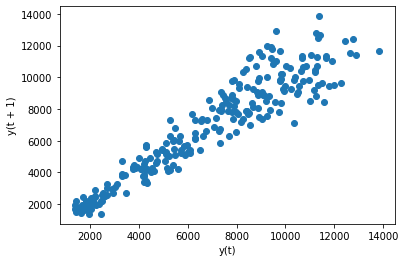

precio_petroleo


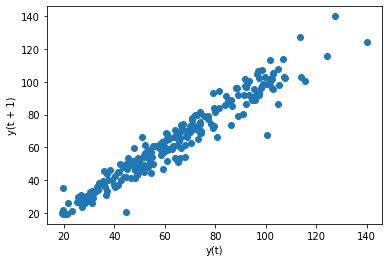

runt_mercado


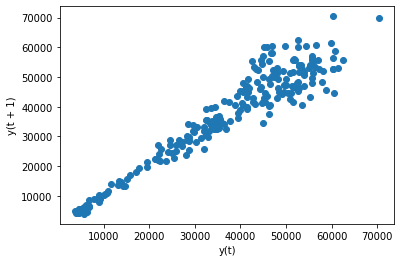

In [ ]:
for i in lista:
  print(i)
  lag_plot(df[i])
  plt.show()

Se identifica un proceso autoregresivo donde las variables aumentan en funcion del tiempo. La dispersion de los puntos respecto a la diagonal no varia tanto y se ve la tendencia o la convergencia a un patron autoregresivo donde la dispersion de cada instancia no es tan grande.

En otras palabras, se quiere explicar si la variable esta en funcion de lo que paso ayer.

Creamos una nueva base de datos donde vamos a diferenciar las series.
Con el fin de eliminar el componente estacionario

## diferenciamos las variables

In [ ]:
df_diff = df.diff(periods = 1)
df_diff["year"] = df["year"]
df_diff["month"] = df["month"] 

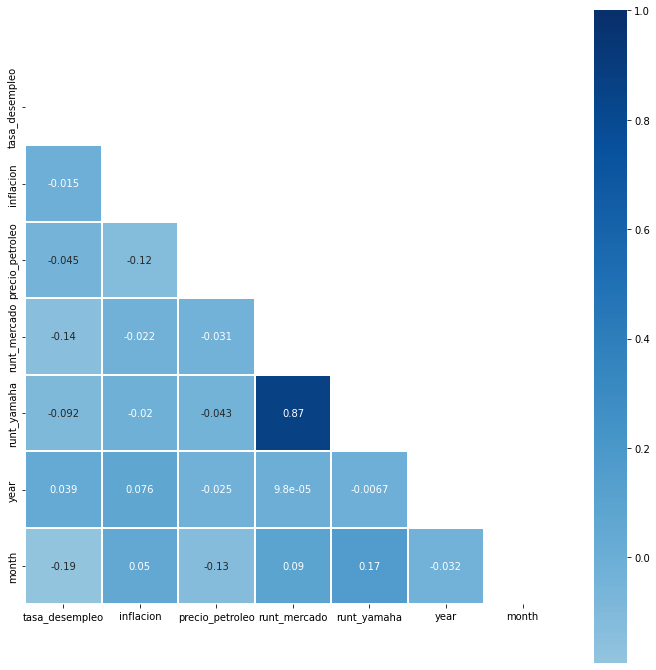

In [ ]:
from IPython.core.pylabtools import figsize
corr_diff = df_diff.corr(method = 'pearson')

mask = np.triu(np.ones_like(corr_diff, dtype =bool))

f, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corr_diff, mask=mask, cmap ='Blues', vmax =1, center =0, square=True, linewidths=1, annot=True)

Si las series tienen orden de integracion 1 significa que solamente requieren ser diferenciadas 1 vez para que sean estacionarias. 

tasa_desempleo


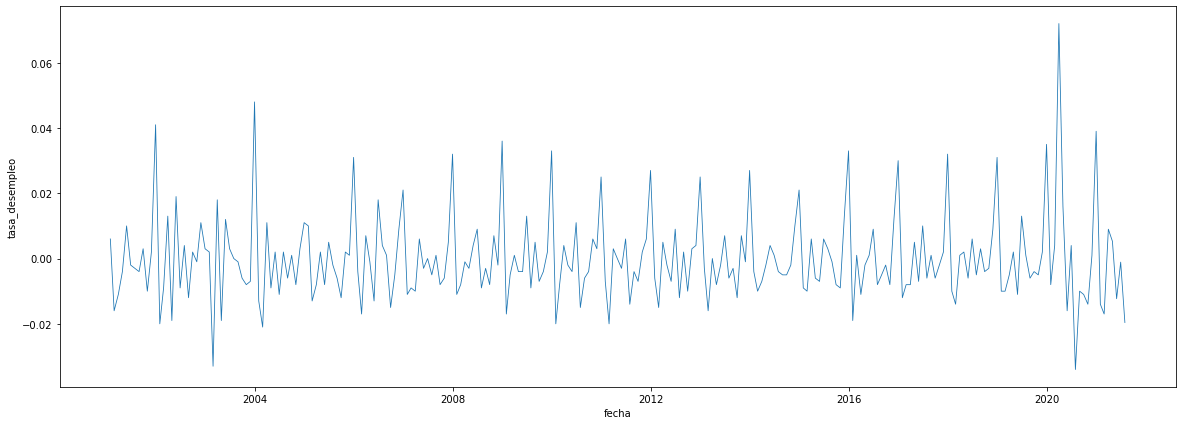

inflacion


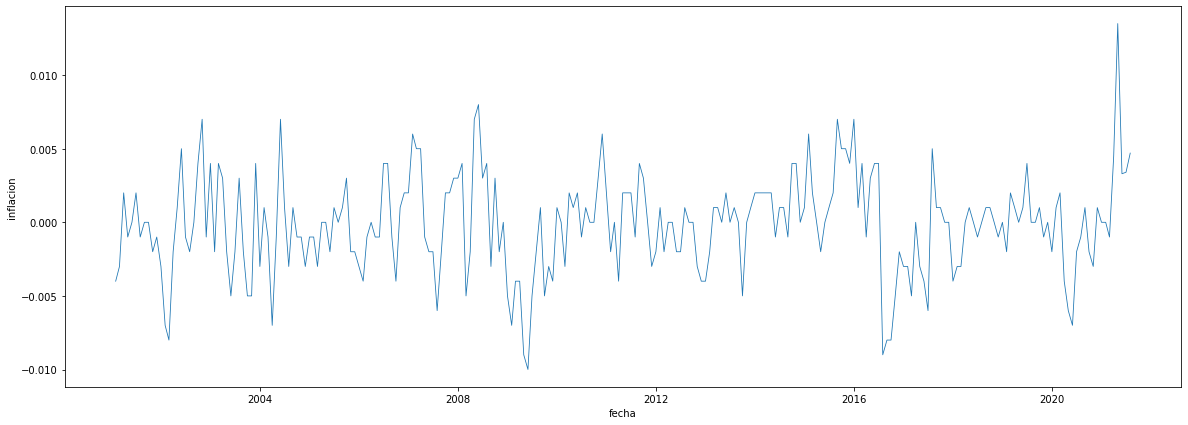

runt_yamaha


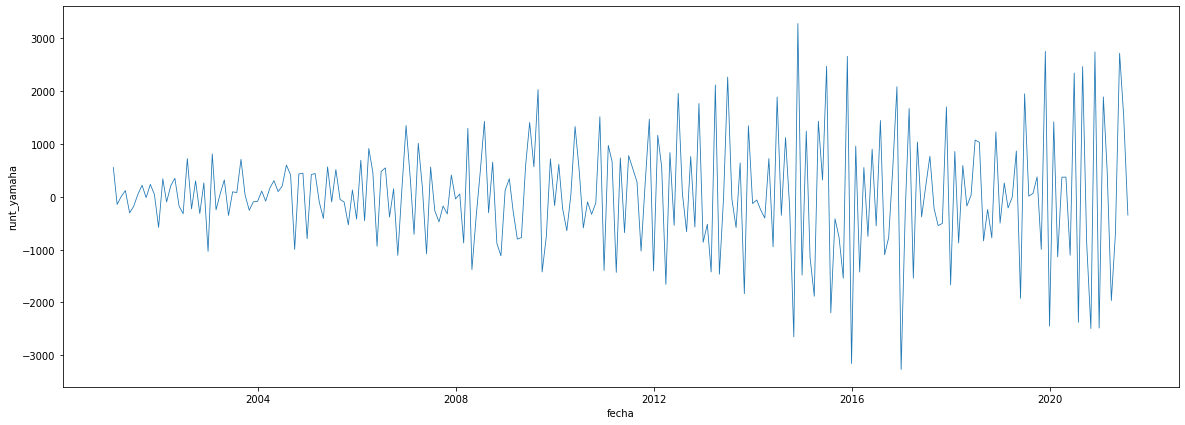

precio_petroleo


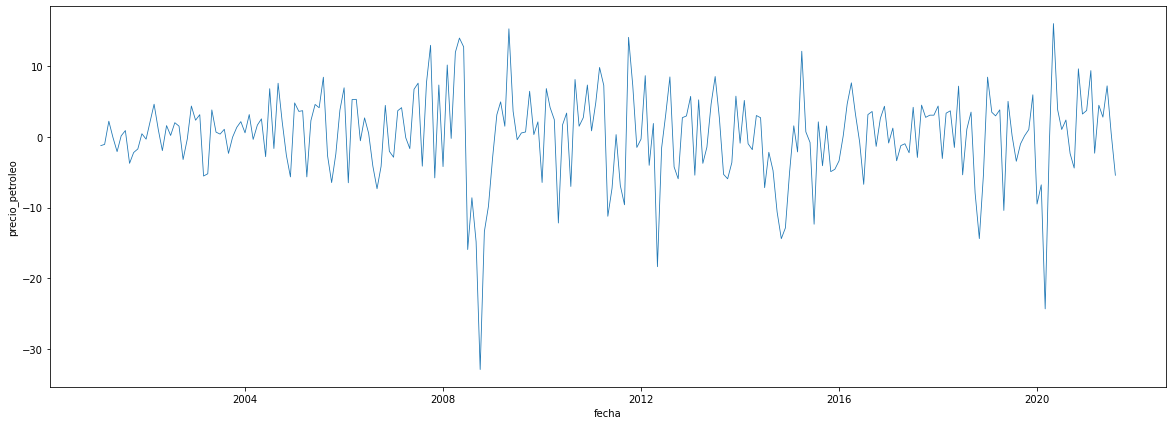

runt_mercado


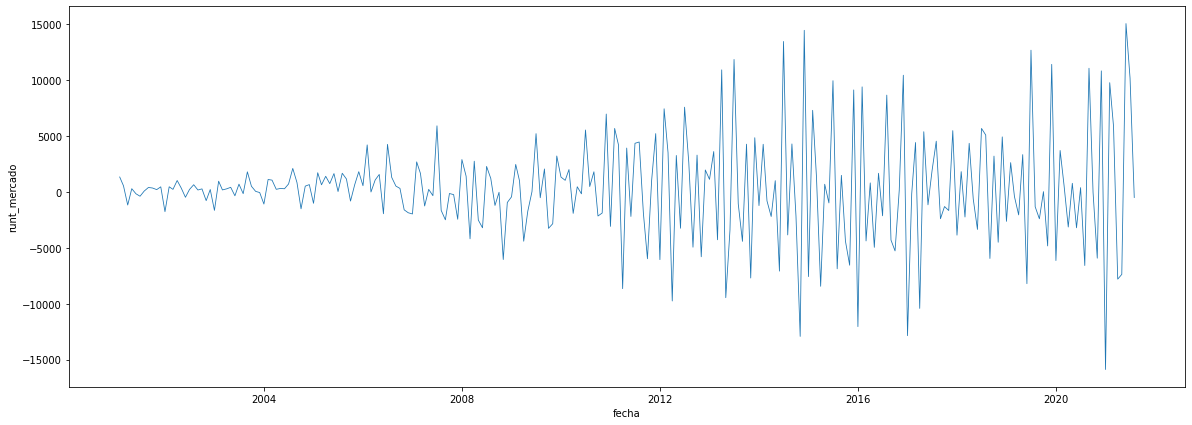

In [ ]:
for i in lista:
  print(i)
  fig,ax = plt.subplots(figsize=(20,7))
  sns.lineplot(data = df_diff, y =i, x= "fecha", linewidth=.8)
  plt.show()

Es posiblle observar la serie de tiempo diferenciada,donde se observa un mejor comportamiento, y se ve un retorno de la media.
Este es un patron que si se puede modelar y pronosticar.

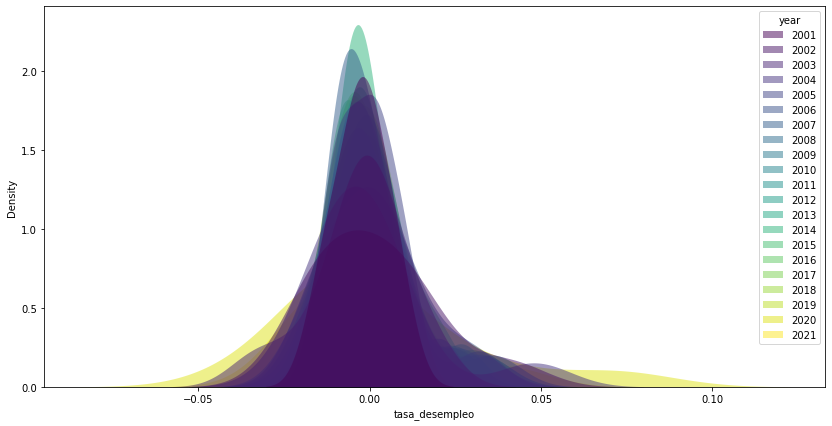

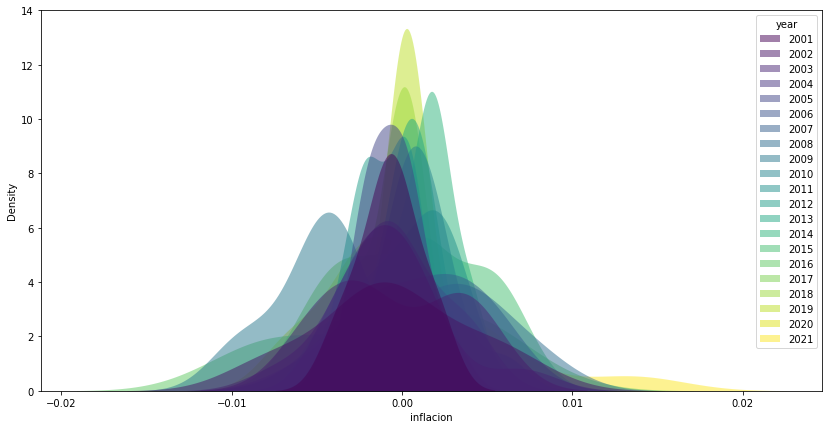

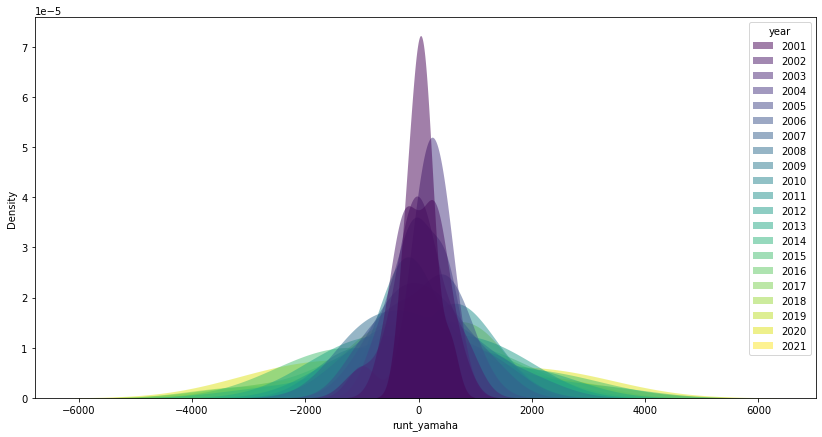

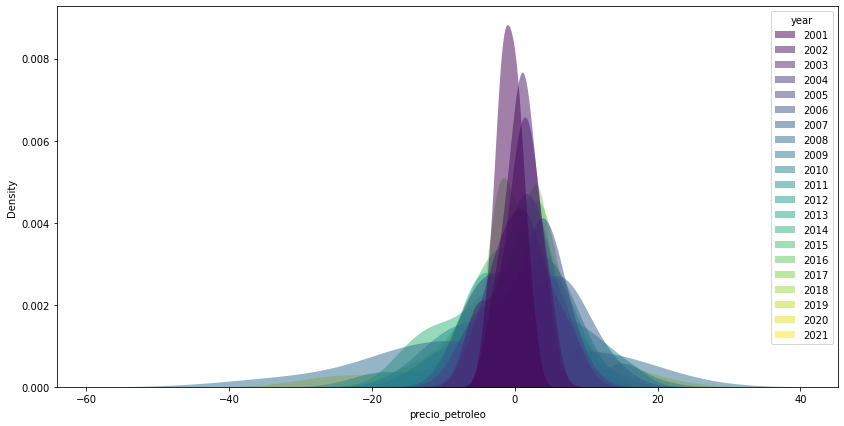

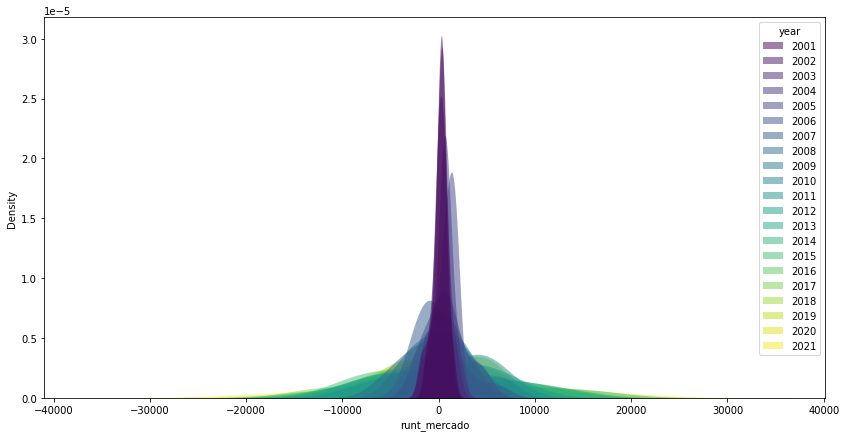

In [ ]:
for i in lista:  
  fig,ax = plt.subplots(figsize=(14,7))
  sns.kdeplot(data=df_diff, x = i, hue="year", fill=True, alpha=.5, linewidth=0, palette="viridis")   
  plt.show()

Encontramos que las variables se comportan mucho mejor despues de diferenciarlas, ya no hay desplazamientos. Las series se comportan de una manera mas modelable que se ve en varianza y en media.

In [ ]:
for i in lista:  
  X = df_diff[i].values 
  X = np.nan_to_num(X)
  result = adfuller(X)
  print(i), print('ADF Statistic %f' % result[0]), print('p-value: %f' % result[1]), print('Critical Values')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

tasa_desempleo
ADF Statistic -4.860023
p-value: 0.000042
Critical Values
	1%: -3.459
	5%: -2.874
	10%: -2.573
inflacion
ADF Statistic -4.806409
p-value: 0.000053
Critical Values
	1%: -3.458
	5%: -2.874
	10%: -2.573
runt_yamaha
ADF Statistic -3.381682
p-value: 0.011599
Critical Values
	1%: -3.459
	5%: -2.874
	10%: -2.573
precio_petroleo
ADF Statistic -12.247927
p-value: 0.000000
Critical Values
	1%: -3.457
	5%: -2.873
	10%: -2.573
runt_mercado
ADF Statistic -2.659485
p-value: 0.081315
Critical Values
	1%: -3.459
	5%: -2.874
	10%: -2.573


Casi todos los p valor dan cero, indicando que el comportamiento es estacionario. 

## **Descomonemos nuestra serie**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df

,tasa_desempleo,inflacion,precio_petroleo,runt_mercado,runt_yamaha,year,month
fecha,,,,,,,
2001-01-01,0.1670,0.0850,28.66,3690,1380,2001,1
2001-02-01,0.1730,0.0810,27.39,5032,1935,2001,2
2001-03-01,0.1570,0.0780,26.29,5581,1791,2001,3
2001-04-01,0.1460,0.0800,28.46,4414,1801,2001,4
2001-05-01,0.1420,0.0790,28.37,4710,1918,2001,5
...,...,...,...,...,...,...,...
2021-04-01,0.1510,0.0195,63.58,52546,9220,2021,4
2021-05-01,0.1563,0.0330,66.32,45169,8517,2021,5
2021-06-01,0.1440,0.0363,73.47,60248,11235,2021,6


In [ ]:
df.columns

Index(['tasa_desempleo', 'inflacion', 'precio_petroleo', 'runt_mercado',
       'runt_yamaha', 'year', 'month'],
      dtype='object')

In [ ]:
result = seasonal_decompose(df.tasa_desempleo, model="additive")

Tasa desempleo


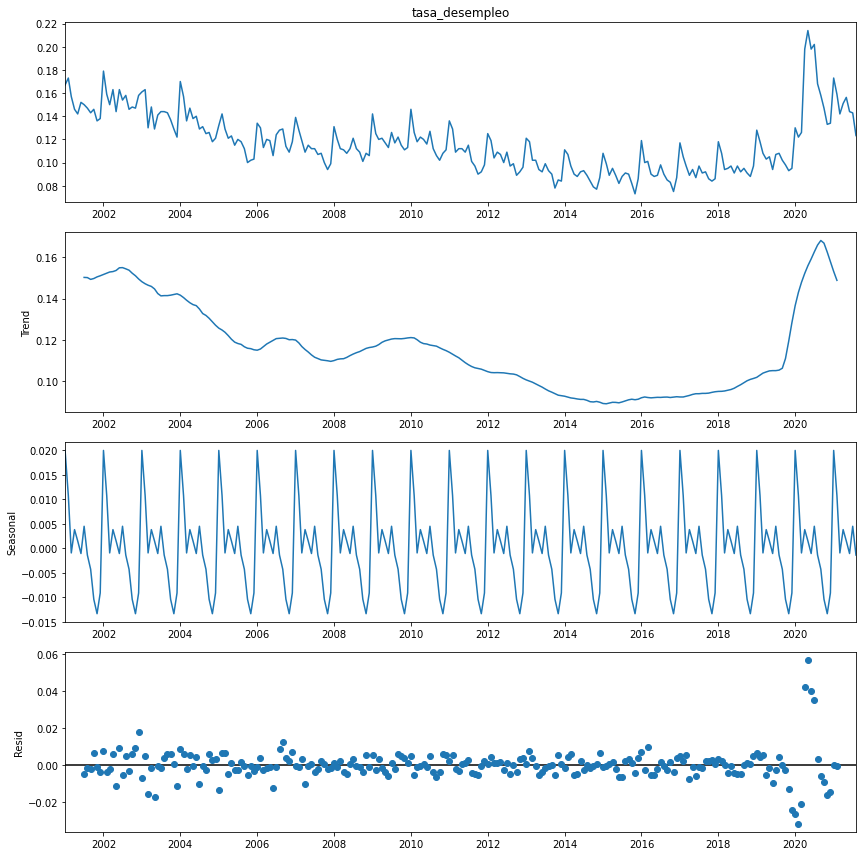

In [ ]:
import matplotlib
print("Tasa desempleo")
matplotlib.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()


inflacion


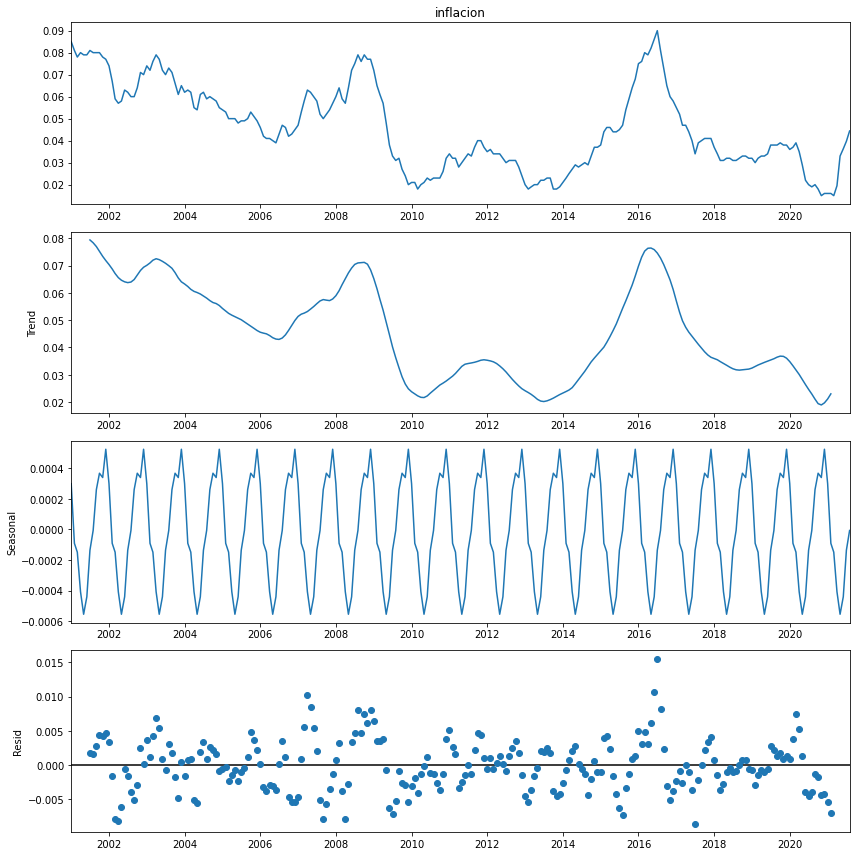

In [ ]:
result2 = seasonal_decompose(df.inflacion, model="additive")
import matplotlib
print("inflacion")
matplotlib.rcParams['figure.figsize'] = [12,12]
result2.plot()
plt.show()


precio_petroleo


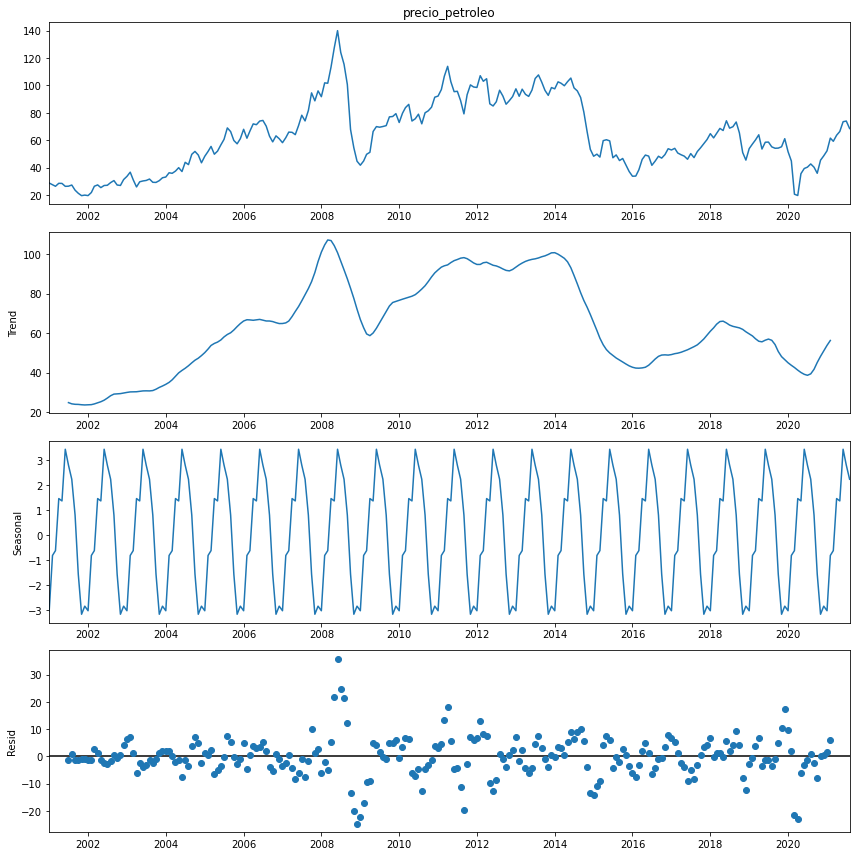

In [ ]:
result3 = seasonal_decompose(df.precio_petroleo, model="additive")
import matplotlib
print("precio_petroleo")
matplotlib.rcParams['figure.figsize'] = [12,12]
result3.plot()
plt.show()

runt_mercado


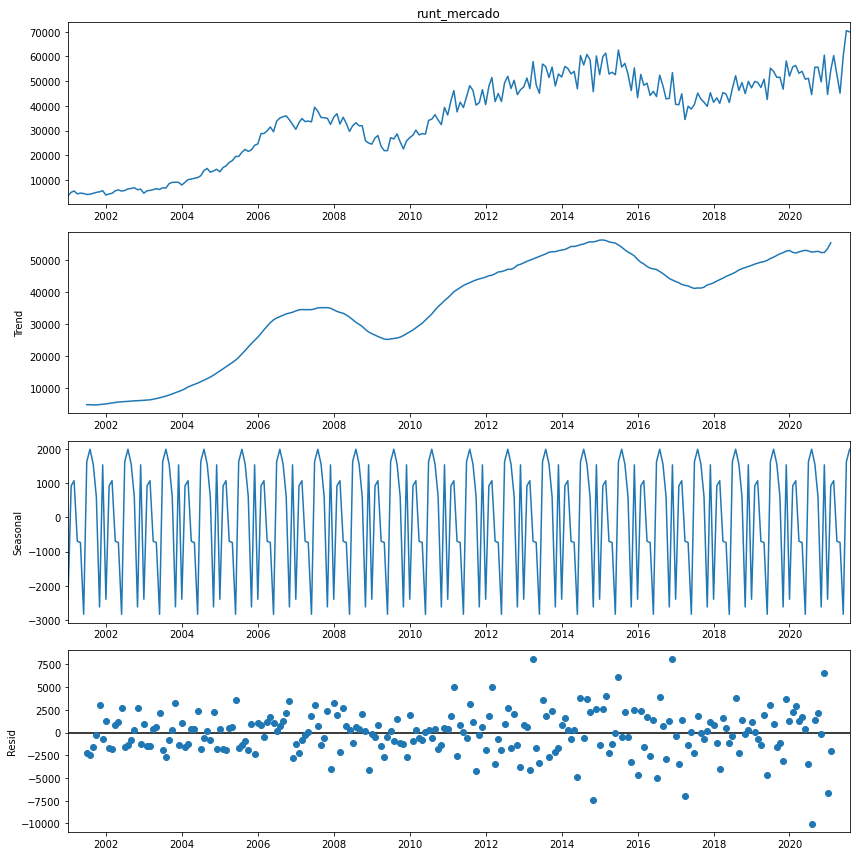

In [ ]:
result4 = seasonal_decompose(df.runt_mercado, model="additive")
import matplotlib
print("runt_mercado")
matplotlib.rcParams['figure.figsize'] = [12,12]
result4.plot()
plt.show()

runt_yamaha


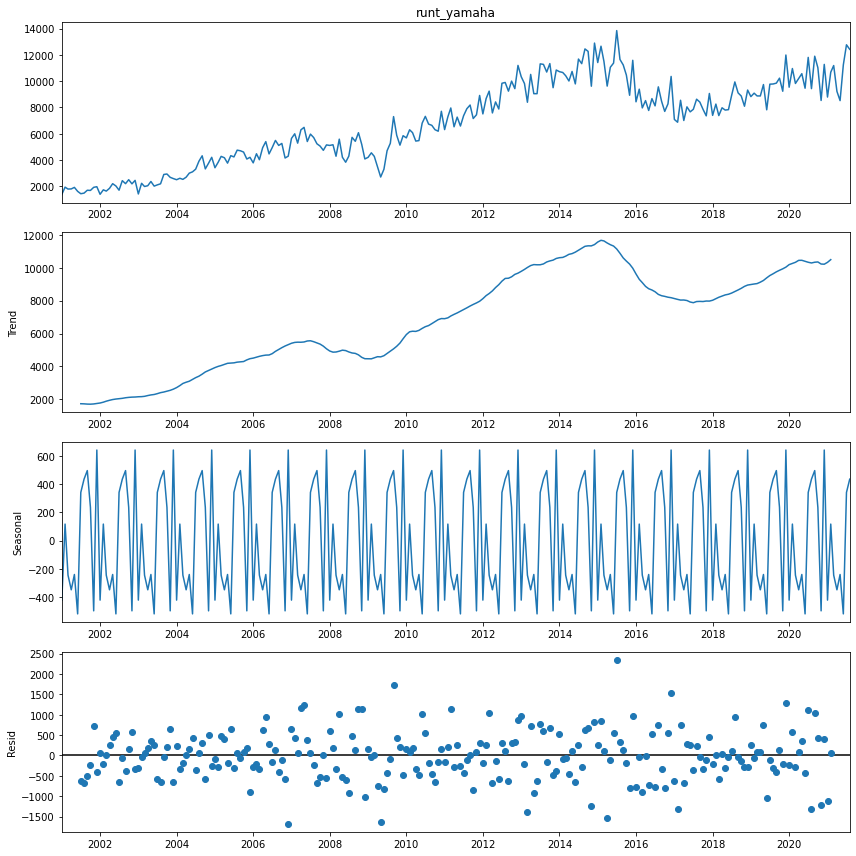

In [ ]:
result5 = seasonal_decompose(df.runt_yamaha, model="additive")
import matplotlib
print("runt_yamaha")
matplotlib.rcParams['figure.figsize'] = [12,12]
result5.plot()
plt.show()

Despues de observar como se comportan las variables ahora vamos a tratar unicamente la variable objetivo. 

## Prediccion de la variable Runt mercado

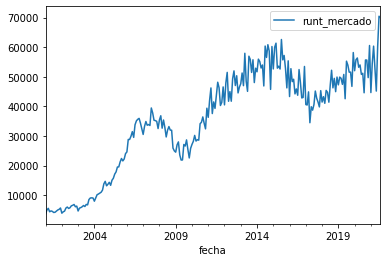

In [ ]:
df['runt_mercado'].plot(legend=True)

In [ ]:
Close = df['runt_mercado'][0:210]

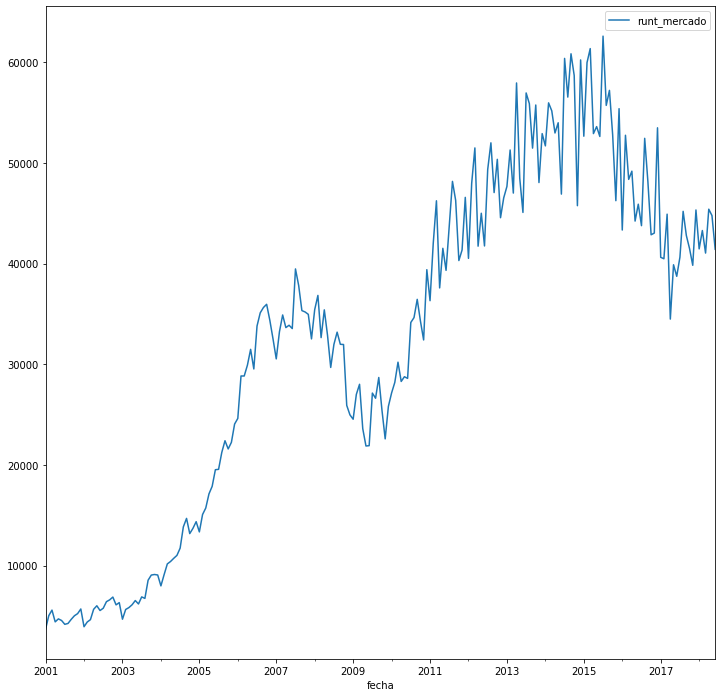

In [ ]:
Close.plot(legend=True)

In [ ]:
df.shape

(248, 7)

In [ ]:
#from statsmodels.tsa.arima_model import ARIMA
import statsmodels

In [ ]:
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape, test.shape)

(218, 7) (30, 7)


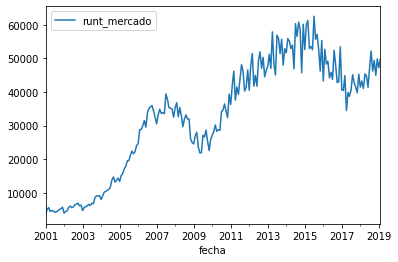

In [ ]:
train["runt_mercado"].plot(legend=True)

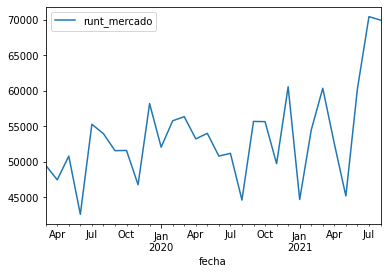

In [ ]:
#test=df['runt_mercado']#[210:248]
test["runt_mercado"].plot(legend=True)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

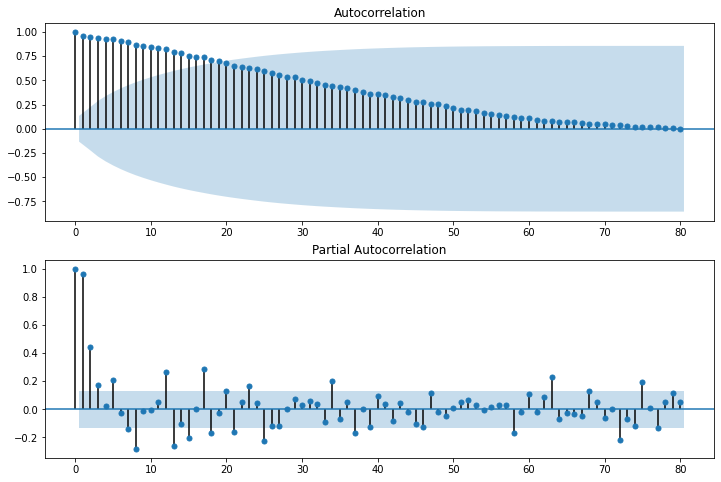

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['runt_mercado'],lags=80,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['runt_mercado'],lags=80,ax=ax2)

basados en el PACF deberiamos emepzar con un modelo autoregresivo con lags de 1, 2, 8, 13

**Observamos la autocorrelacion con la primera derivada**

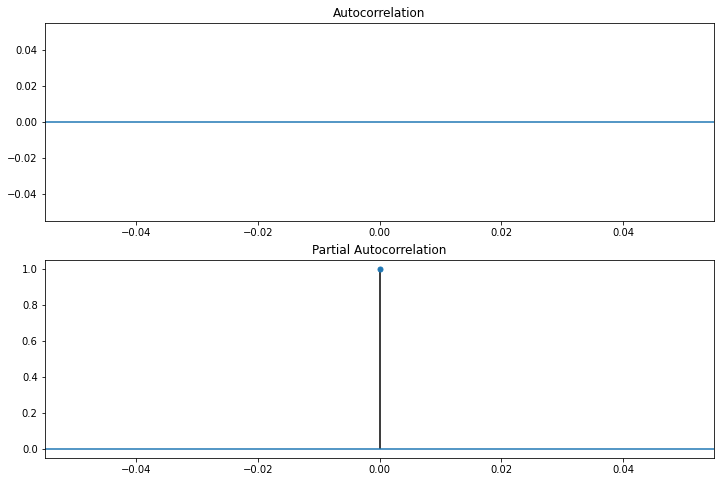

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_diff['runt_mercado'],ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_diff['runt_mercado'],ax=ax2)

## ARIMA

In [ ]:
model=ARIMA(train['runt_mercado'],order=(4,1,4))
model_fit=model.fit()
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:         D.runt_mercado   No. Observations:                  217
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -2042.990
Method:                       css-mle   S.D. of innovations           2941.137
Date:                Sun, 06 Mar 2022   AIC                           4105.980
Time:                        00:07:24   BIC                           4139.779
Sample:                    02-01-2001   HQIC                          4119.634
                         - 02-01-2019                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  203.7205     92.084      2.212      0.028      23.239     384.202
ar.L1.D.runt_mercado    -0.2272      0.134     -1.702      0.090      -0.489       0.034
ar.L2.D.runt

In [ ]:
#model = statsmodels.tsa.arima.model.ARIMA(Close, order=(4,0,4))
#model_fit=model.fit()
#print(model_fit.summary()) 

Si el valor z es mayor a el valor absoluto de 1.96 significa que es estadisticamente significativo.

EL valor p es menor 0.05 es significativo.

Mi intervalo de confianza esta en 0.025 y 0.975, percentil 2.5 y 97.5.


### Predecimos

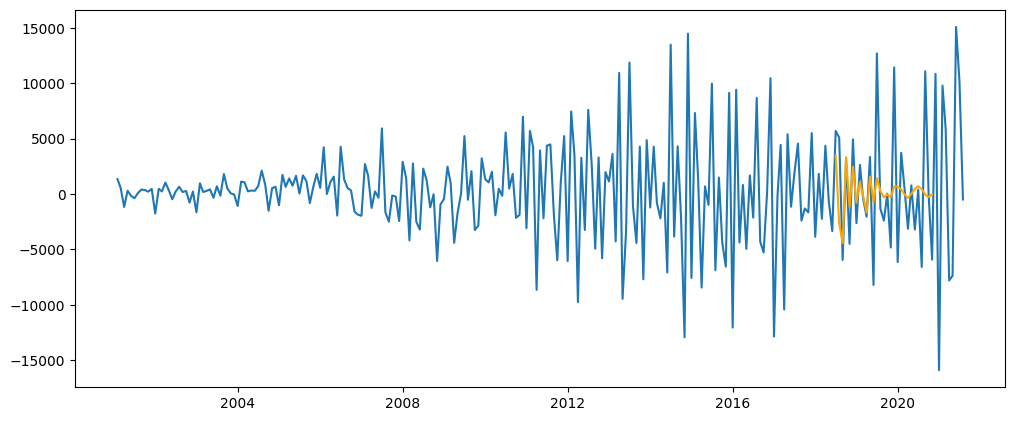

In [ ]:
fc = model_fit.predict(start=210, end=238)
fc_series = pd.Series(fc)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_diff['runt_mercado'], label = "training")
#plt.plot(test["runt_mercado"], color='blue', label="Actual runt mercado")

plt.plot(fc_series, color = 'orange', label= "Predicted runt mercado")

plt.show() 

Realizamos predicciones para el test

In [ ]:
from sklearn.metrics import mean_squared_error

from math import sqrt
rmse = sqrt(mean_squared_error(test['runt_mercado'][0:29], fc)) 
print(rmse)

53146.882716494656


In [ ]:
#index_future_dataset = pd.date_range(start='2021-08-01', end='2022-12-01')

pred =model2.predict(start = len(df), end=len(df)+16).rename('ARIMA predictions') 

#pred.index = index_future_dataset
print(pred) 

2021-09-01    61165.345141
2021-10-01    62473.918497
2021-11-01    62783.185162
2021-12-01    69585.968508
2022-01-01    67421.176187
2022-02-01    68770.272902
2022-03-01    67942.371618
2022-04-01    65571.425747
2022-05-01    68722.750065
2022-06-01    65283.983797
2022-07-01    68515.825970
2022-08-01    66910.805859
2022-09-01    66709.196269
2022-10-01    68620.827317
2022-11-01    65403.658840
2022-12-01    68939.100440
2023-01-01    66033.425767
Freq: MS, Name: ARIMA predictions, dtype: float64


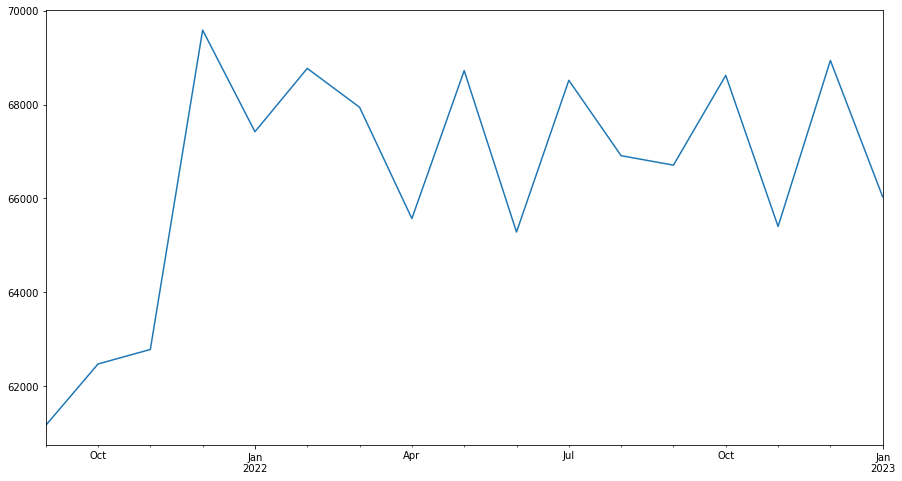

In [ ]:
pred.plot()

In [ ]:
df2 = df.copy()

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,16)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_df=pd.concat([df,future_datest_df])

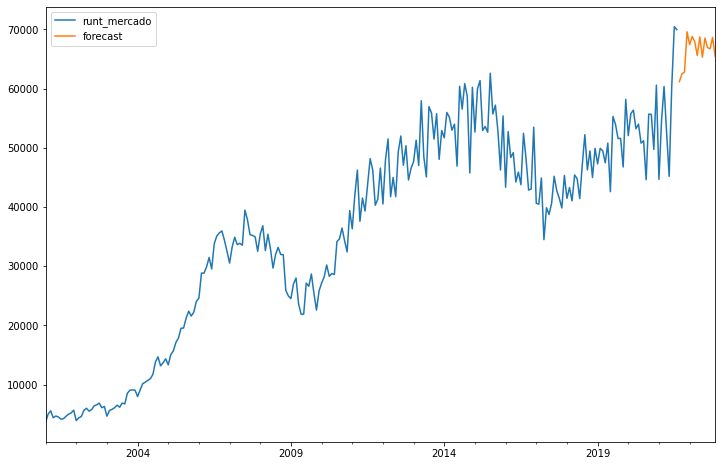

In [ ]:
import matplotlib.pyplot as plt

future_df['forecast'] = model2.predict(start = len(df), end = len(df)+16, dynamic= True)  
future_df[['runt_mercado', 'forecast']].plot(figsize=(12, 8))
#plt.xlim(min(future_df.index), max(future_df.index))

In [ ]:
#model2 =statsmodels.tsa.arima.model.ARIMA(df['runt_mercado'], order=(4,0,4))
#model2=model.fit()
#df.tail()

## SARIMAX

In [ ]:
model=sm.tsa.statespace.SARIMAX(train['runt_mercado'],order=(4,2,4), seasonal_oder=(4,2,4,12))
model_fit=model.fit() 
print(model_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                           Statespace Model Results                           
Dep. Variable:           runt_mercado   No. Observations:                  218
Model:               SARIMAX(4, 2, 4)   Log Likelihood               -2040.421
Date:                Sun, 06 Mar 2022   AIC                           4098.842
Time:                        02:27:28   BIC                           4129.219
Sample:                    01-01-2001   HQIC                          4111.114
                         - 02-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1086      0.200      0.542      0.588      -0.284       0.501
ar.L2         -0.5390      0.093     -5.790      0.000      -0.721      -0.357
ar.L3         -0.4389      0.076     -5.757      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  


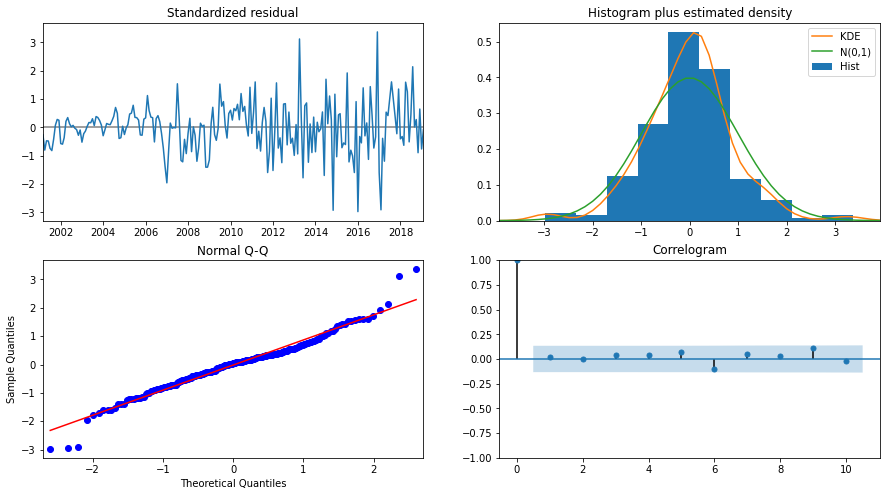

In [ ]:
model_fit.plot_diagnostics()
plt.show()

In [ ]:
#model2=sm.tsa.statespace.SARIMAX(df['runt_mercado'],order=(4,1,4))
#model2 = model2.fit()
#df.tail()

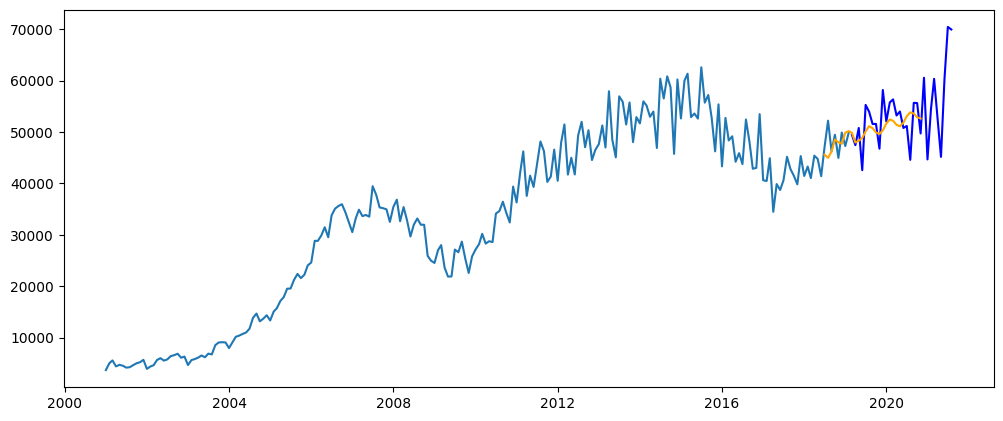

In [ ]:
fc = model_fit.predict(start=210, end=238)
fc_series = pd.Series(fc)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train['runt_mercado'], label = "training")
plt.plot(test["runt_mercado"], color='blue', label="Actual runt mercado")

plt.plot(fc_series, color = 'orange', label= "Predicted runt mercado")

plt.show() 

In [ ]:
rmse = sqrt(mean_squared_error(test['runt_mercado'][0:29], fc)) 
print(rmse)

6163.649645574384


In [ ]:
#index_future_dataset = pd.date_range(start='2021-08-01', end='2022-12-01')

pred = model_fit.forecast(17).rename('SARIMAX predictions') 

#pred.index = index_future_dataset
print(pred) 

2019-03-01    49841.233339
2019-04-01    47967.996219
2019-05-01    48303.852592
2019-06-01    48838.921921
2019-07-01    50117.647201
2019-08-01    51151.798172
2019-09-01    50753.441789
2019-10-01    49922.120594
2019-11-01    49614.365214
2019-12-01    50327.233966
2020-01-01    51653.864752
2020-02-01    52447.074521
2020-03-01    52186.029430
2020-04-01    51404.617538
2020-05-01    51114.125434
2020-06-01    51841.782923
2020-07-01    53081.770335
Freq: MS, Name: SARIMAX predictions, dtype: float64


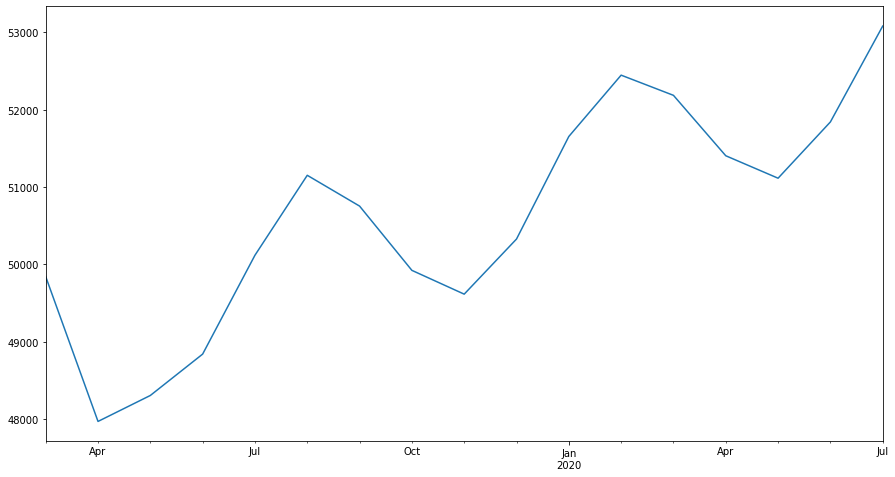

In [ ]:
pred.plot()

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates1=[df.index[-1]+ DateOffset(months=x)for x in range(0,16)]

In [ ]:
future_datest_df1=pd.DataFrame(index=future_dates1[1:],columns=df.columns)

In [ ]:
future_df1=pd.concat([df,future_datest_df1])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  Returns


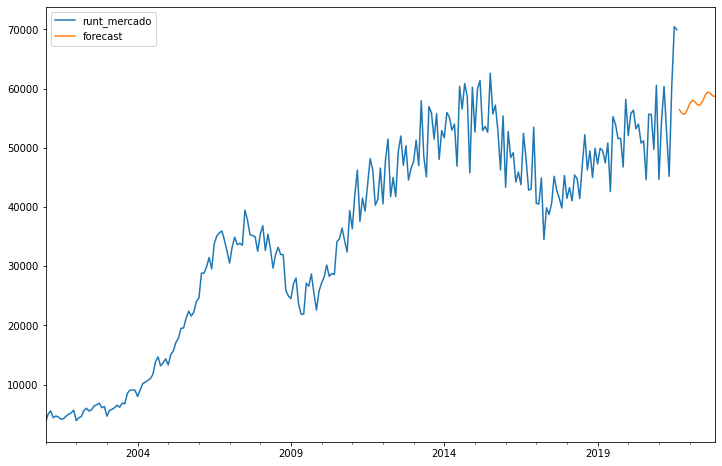

In [ ]:
import matplotlib.pyplot as plt

future_df1['forecast'] = model_fit.predict(start = len(df), end = len(df)+16, dynamic= True)  
future_df1[['runt_mercado', 'forecast']].plot(figsize=(12, 8))
#plt.xlim(min(future_df.index), max(future_df.index))


In [ ]:
min(future_df.index)

Timestamp('2001-01-01 00:00:00')

In [ ]:
min(df.index)

Timestamp('2001-01-01 00:00:00')

#Resultados

Se puede osbervar que la prediccion revela un aumento en la venta de motocicletas para el año 2022 hasta el 12 de diciembre. 

El resultado es lo que se esperaba al contar con tan pocos datos.
Sin embargo el error RMSE en comparacion con la dimension de mi variable se puede considerar un error no tan malo.

Dificultades a la hora de realizar este proyecto en google colab. Hay librerias para manejar series de tiempo que ya no estan disponibles para esta version de python. Asi que el analisis fue muy limitado.  Se podria optmimizar al tener la version de python > 3.8. 